In [11]:
'''
Sneha Nair
260850706
Phys 432- Fluids Assignment 2
'''

## Importing the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly
import plotly.figure_factory as ff
from PIL import Image
import glob
import os
import imageio

In [46]:
'''
The first thing I would like to do is establisbh the necessary variables I will be working with.
'''
dt = 0.2
Nsteps = 120

In [13]:
## Setting the intial conditions for the vortex center and circulation
y_v=np.array([5,5,9,9])
x_v=np.array([5,9,5,9])
k_v=np.array([2,2,-2,-2])

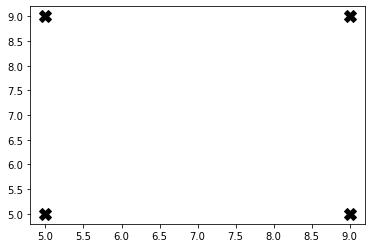

In [42]:
#Intial Plot of the Vortices
plt.ion()
fig, ax = plt.subplots(1,1)
p, = ax.plot(x_v,y_v, 'kX', markersize=12)


#Intial velocity streamline
ngrid = 2
## I find that it is easier to use values that correspond to a grid that is more relevant to vortex coords.
Y, X = np.mgrid[3:14:360j,2:50:360j]

vel_x=np.zeros(np.shape(Y))
vel_y=np.zeros(np.shape(Y))

#Establishing our Masking Radius
r_mask = 1


In [40]:
## I want to compute the velocity field on the meshgrid

## It would be easier to do this first by computing the velocity from each meshgrid element explicitly.
## We can then call this function from our loop vortex function and store the relevant variables. 
def compute_velocity(X_i,Y_i,x_vi,y_vi,kval):
    distance = np.sqrt((x_vi-X_i)**2+(y_vi-Y_i)**2)
    u_y = (kval/distance)*(x_vi-X_i)/distance
    u_x = (-kval/distance)*(y_vi-Y_i)/distance
    return (u_x,u_y)

# Now after computing the velocities I would like to then loop through each vortex

def loop_vortex(Xgrid,Ygrid,x_v,y_v,k_v,mask):
    # First make a duplicate array with the same length as the meshgrid. 
    x_new =np.zeros(np.shape(X))
    y_new= np.zeros(np.shape(Y))
    for i in range(len(x_v)):
        for j in range(len(Xgrid)):
            for k in range(len(Ygrid)):
                #establishing variables so that its easier to work with
                X_gridval = Xgrid[j]
                Y_gridval = Ygrid[k]
                x_vi = x_v[i]
                y_vi = y_v[i]
                k_val = k_v[i]
                distance =  np.sqrt((x_v[i]-j)**2+(y_v[i]-k)**2)
                if distance <= mask:
                    x_new[k] = np.nan
                    y_new[k] = np.nan
                else:
                    result = compute_velocity(X_gridval,Y_gridval,x_vi,y_vi,k_val)
                    x_new[k][j] += result[0]
                    y_new[k][j] += result[1]
                
    return (x_new,y_new)
    
# After we have looped through each vortex let us design how we are going to advance the vortices.

def advance_vortex(x_curr,y_curr,k_v):
    x_len=len(x_curr)
    y_len=len(y_curr)
    newx = np.zeros(x_len)
    newy = np.zeros(y_len)
    for i in range(len(x_curr)):
        v_x =0
        v_y =0
        for k in range(len(y_curr)):
            if k!=i: 
                result = compute_velocity(x_curr[i],y_curr[i],x_curr[k],y_curr[k],k_v[k])
                v_x += result[0]
                v_y += result[1]
        # formula from the sample co
        newx[i] = x_curr[i] + v_x*dt
        newy[i] = y_curr[i] + v_y*dt
    return (newx,newy)
    
    
        


    

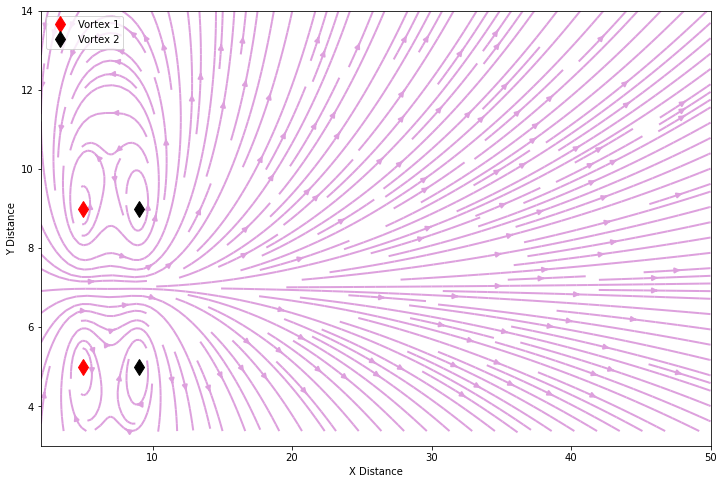

In [44]:
#Looking at the vortex for starting time.
x,y = loop_vortex(X[0], Y[:,0], x_v, y_v, k_v, r_mask)
# Take the first and third element of the array and name it vortex 1 and then take the second and fourth name it vortex 2
vort_1_x=np.array([x_v[0],x_v[2]])
vort_1_y=np.array([y_v[0],y_v[2]])
vort_2_x=np.array([x_v[1],x_v[3]])
vort_2_y=np.array([y_v[1],y_v[3]])
## Test Method to plot the intial image of the vortex ring.
plt.figure(figsize=(12, 8))
plt.plot(vort_1_x,vort_1_y,'rd',markersize=12,label='Vortex 1')
plt.plot(vort_2_x,vort_2_y,'kd',markersize=12,label='Vortex 2')
plt.streamplot(X,Y,x,y,density=[2,2],linewidth=2,color='plum')
plt.xlabel('X Distance')
plt.ylabel('Y Distance')
plt.legend(loc="upper left")

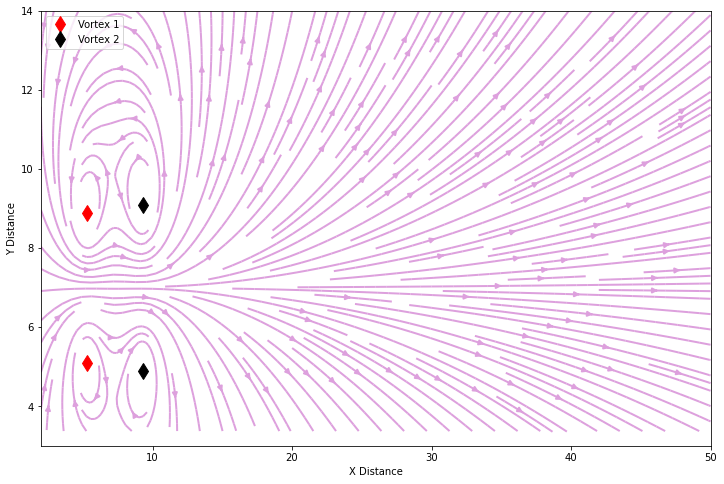

In [45]:
x_new,y_new = advance_vortex(x_v,y_v,k_v)
x,y = loop_vortex(X[0], Y[:,0], x_new, y_new, k_v, r_mask)
vort_1_x=np.array([x_new[0],x_new[2]])
vort_1_y=np.array([y_new[0],y_new[2]])
vort_2_x=np.array([x_new[1],x_new[3]])
vort_2_y=np.array([y_new[1],y_new[3]])
plt.figure(figsize=(12, 8))
plt.plot(vort_1_x,vort_1_y,'rd',markersize=12,label='Vortex 1')
plt.plot(vort_2_x,vort_2_y,'kd',markersize=12,label='Vortex 2')
plt.streamplot(X,Y,x,y,density=[2,2],linewidth=2,color='plum')
plt.xlabel('X Distance')
plt.ylabel('Y Distance')
plt.legend(loc="upper left")

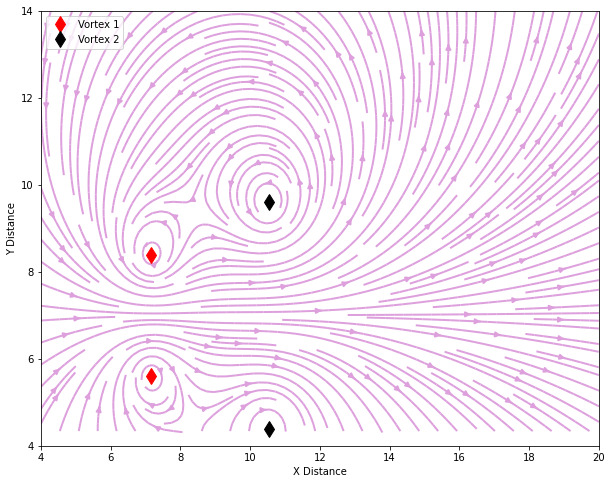

In [36]:

x_new2,y_new2 = advance_vortex(x_new,y_new,k_v)
x,y = loop_vortex(X[0], Y[:,0], x_new2, y_new2, k_v, r_mask)
vort_1_x=np.array([x_new2[0],x_new2[2]])
vort_1_y=np.array([y_new2[0],y_new2[2]])
vort_2_x=np.array([x_new2[1],x_new2[3]])
vort_2_y=np.array([y_new2[1],y_new2[3]])
plt.figure(figsize=(10, 8))
plt.plot(vort_1_x,vort_1_y,'rd',markersize=12,label='Vortex 1')
plt.plot(vort_2_x,vort_2_y,'kd',markersize=12,label='Vortex 2')
plt.streamplot(X,Y,x,y,density=[2,2],linewidth=2,color='plum')
plt.xlabel('X Distance')
plt.ylabel('Y Distance')
plt.legend(loc="upper left")





In [299]:
## Tester Stuff
print(x_v,y_v)
print(x_new,y_new)
print(x_new2,y_new2)

[5 9 5 9] [5 5 9 9]
[5.0375, 9.0375, 5.0375, 9.0375] [5.0125, 4.9875, 8.9875, 9.0125]
[5.075313476601125, 9.074688476600171, 5.075313476601125, 9.074688476600171] [5.024999023475646, 4.975000976524354, 8.975000976524354, 9.024999023475646]


<ipython-input-47-9e6137faf4f7>:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12, 8))


<Figure size 432x288 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

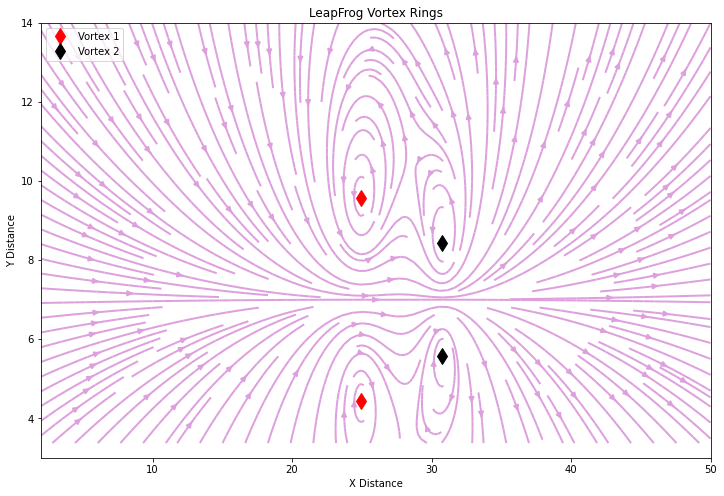

In [47]:
## Okay now the goal is to run through this several times over until we get to the appropriate number of timesteps.
count = 0 
intial_x = x_v
intial_y = y_v
while count < Nsteps:
    plt.clf()
    x_new,y_new = advance_vortex(intial_x,intial_y,k_v)
    intial_x = x_new
    intial_y = y_new
    x,y=loop_vortex(X[0], Y[:,0], x_new, y_new, k_v, r_mask)
    vort_1_x=np.array([x_new[0],x_new[2]])
    vort_1_y=np.array([y_new[0],y_new[2]])
    vort_2_x=np.array([x_new[1],x_new[3]])
    vort_2_y=np.array([y_new[1],y_new[3]])
    plt.figure(figsize=(12, 8))
    plt.plot(vort_1_x,vort_1_y,'rd',markersize=12,label='Vortex 1')
    plt.plot(vort_2_x,vort_2_y,'kd',markersize=12,label='Vortex 2')
    plt.xlabel('X Distance')
    plt.ylabel('Y Distance')
    plt.title('LeapFrog Vortex Rings')
    plt.streamplot(X,Y,x,y,density=[2,2],linewidth=2,color='plum')
    plt.legend(loc="upper left")
    plt.savefig('fig'+ str(count+1) +'.png')
    count += 1

In [48]:
## Now to combine all of the png files into a gif

# Create the frames
frames = []
imgs = glob.glob("fig*.png")
list.sort(imgs, key=lambda x: int(x.split('fig')[1].split('.png')[0]))
# Sort the images by #, this may need to be tweaked for your use case

with open('image_list2.txt', 'w') as file:
    for item in imgs:
        file.write("%s\n" % item)


inorder = open("image_list2.txt").readlines()

for i in imgs:
    frame = Image.open(i)
    frames.append(frame)

frames[0].save('leapfrog.gif',save_all=True,append_images=frames[1:],duration=100,loop=0)





